### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
tf.__version__

'2.3.0'

## Data Pre-processing

### Importing the data

In [3]:
dataset = pd.read_csv('musk_csv.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [4]:
print(X)

[[  46 -108  -60 ...  -50 -112   96]
 [  41 -188 -145 ...  -61 -136   79]
 [  46 -194 -145 ...  -67 -145   39]
 ...
 [  44 -102  -19 ...  -66 -144   -6]
 [  51 -121  -23 ...  -44 -116  117]
 [  51 -122  -23 ...  -44 -115  118]]


In [5]:
print(y)

[1 1 1 ... 0 0 0]


### Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Building the ANN

### Initializing the ANN

In [8]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [9]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [10]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [11]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

### Compiling the ANN

In [12]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [13]:
history = ann.fit(X_train, y_train, batch_size = 32, epochs = 25)

Epoch 1/25
165/165 [==============================] - 0s 1ms/step - loss: 0.4043 - accuracy: 0.8344
Epoch 2/25
165/165 [==============================] - 0s 1ms/step - loss: 0.2253 - accuracy: 0.9183
Epoch 3/25
165/165 [==============================] - 0s 1ms/step - loss: 0.1784 - accuracy: 0.9354
Epoch 4/25
165/165 [==============================] - 0s 1ms/step - loss: 0.1550 - accuracy: 0.9424
Epoch 5/25
165/165 [==============================] - 0s 1ms/step - loss: 0.1393 - accuracy: 0.9485
Epoch 6/25
165/165 [==============================] - 0s 1ms/step - loss: 0.1273 - accuracy: 0.9530
Epoch 7/25
165/165 [==============================] - 0s 1ms/step - loss: 0.1186 - accuracy: 0.9560
Epoch 8/25
165/165 [==============================] - 0s 1ms/step - loss: 0.1109 - accuracy: 0.9579
Epoch 9/25
165/165 [==============================] - 0s 1ms/step - loss: 0.1043 - accuracy: 0.9608
Epoch 10/25
165/165 [==============================] - 0s 1ms/step - loss: 0.0971 - accuracy: 0.9615

### Testing the ANN on the Test set

In [14]:
validation = ann.fit(X_test, y_test, batch_size = 32, epochs = 25)

Epoch 1/25
42/42 [==============================] - 0s 1ms/step - loss: 0.0731 - accuracy: 0.9758
Epoch 2/25
42/42 [==============================] - 0s 925us/step - loss: 0.0559 - accuracy: 0.9765
Epoch 3/25
42/42 [==============================] - 0s 1ms/step - loss: 0.0499 - accuracy: 0.9826
Epoch 4/25
42/42 [==============================] - 0s 949us/step - loss: 0.0439 - accuracy: 0.9856
Epoch 5/25
42/42 [==============================] - 0s 1ms/step - loss: 0.0387 - accuracy: 0.9864
Epoch 6/25
42/42 [==============================] - 0s 1ms/step - loss: 0.0387 - accuracy: 0.9848
Epoch 7/25
42/42 [==============================] - 0s 1ms/step - loss: 0.0377 - accuracy: 0.9833
Epoch 8/25
42/42 [==============================] - 0s 1ms/step - loss: 0.0324 - accuracy: 0.9894
Epoch 9/25
42/42 [==============================] - 0s 1ms/step - loss: 0.0296 - accuracy: 0.9909
Epoch 10/25
42/42 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9909
Epoch 11/25
42/

### Predicting the Test set results

In [15]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1120    0]
 [   3  197]]


0.9977272727272727

## Results

### Getting the Loss and Precision values

In [17]:
final_loss, final_acc = ann.evaluate(X_test, y_test, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.0102, final accuracy: 0.9977


### Making the graphs for Loss and Accuracy

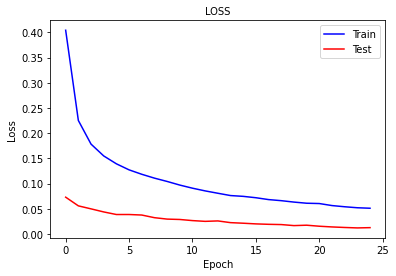

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'], color='b', label='Train')
plt.plot(validation.history['loss'], color='r', label='Test')
plt.title("LOSS", size="10")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

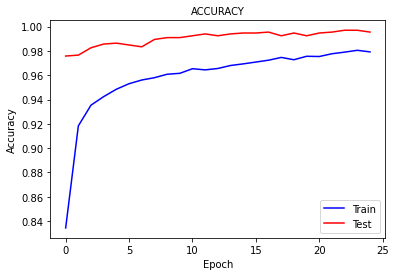

In [20]:
plt.plot(history.history['accuracy'], color='b', label='Train')
plt.plot(validation.history['accuracy'], color='r', label='Test')
plt.title("ACCURACY", size="10")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

### Getting Precision, Recall and F-Score

In [27]:
from sklearn.metrics import precision_recall_fscore_support
scores=precision_recall_fscore_support(y_test, y_pred, average='weighted')
print('Precision:', scores[0])
print('Recall:', scores[1])
print('F-Score:', scores[2])

(0.9977333441269326, 0.9977272727272727, 0.9977202054765502, None)
Precision: 0.9977333441269326
Recall: 0.9977272727272727
F-Score: 0.9977202054765502


### Saving the model

In [28]:
ann.save("ChemicalCompoundClass_ANN.h5")